# Cryptocurrency Clusters
### Reading in the Data

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
file_path = Path("resources/crypto_data.csv")
crypto_df = pd.read_csv(file_path)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
crypto_df.IsTrading.value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

### Cleaning the Data

In [4]:
crypto_trading = crypto_df[crypto_df['IsTrading'] == True] 
crypto_trading.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
crypto_trading.IsTrading.value_counts()

True    1144
Name: IsTrading, dtype: int64

In [6]:
crypto_drop = crypto_trading.drop(["IsTrading"], axis=1)
crypto_drop.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [7]:
crypto_drop.isnull().values.any()

True

In [8]:
crypto_dropnas = crypto_drop.dropna()
crypto_resetindex = crypto_dropnas.reset_index(drop=True)
crypto_resetindex.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
2,808,808,SHA-256,PoW/PoS,0.000000e+00,0
3,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
4,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [9]:
crypto_mined = crypto_resetindex[crypto_resetindex['TotalCoinsMined'] > 0]
crypto_mined.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
4,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
5,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [10]:
crypto_drop_coinname = crypto_mined.drop(["CoinName"], axis=1)
crypto_drop_coinname.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
1,404,Scrypt,PoW/PoS,1.055185e+09,532000000
3,1337,X13,PoW/PoS,2.927942e+10,314159265359
4,BTC,SHA-256,PoW,1.792718e+07,21000000
5,ETH,Ethash,PoW,1.076842e+08,0


In [11]:
crypto_drop_coinname.dtypes

Unnamed: 0          object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [12]:
crypto_dummies = pd.get_dummies(data = crypto_drop_coinname, columns = ['Algorithm', 'ProofType'])
crypto_dummies.head()

,Unnamed: 0,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,404,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,ETH,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
crypto_dummies.set_index("Unnamed: 0", inplace=True)
crypto_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#crypto_dummies.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(crypto_dummies)

In [15]:
X_scaled[:5]

array([[-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
        -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
        -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
        -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
        -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
        -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
        -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
        -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
        -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.39879994, -0.0433963 , -0.1

In [16]:
#reducing the amount of columns to reduce noise.
pca_model = PCA(n_components=0.90)

In [17]:
X_pca = pca_model.fit_transform(X_scaled)

In [18]:
pca_model.explained_variance_

array([2.74246154, 2.1029187 , 2.01436892, 2.00754156, 2.00754005,
       2.00754005, 2.00754005, 2.00547232, 1.8369474 , 1.72440686,
       1.70949674, 1.59943293, 1.56717658, 1.52297788, 1.40895337,
       1.29713801, 1.21413359, 1.18435602, 1.08424717, 1.05204614,
       1.03003376, 1.02198993, 1.02022505, 1.01890094, 1.01661666,
       1.01526166, 1.01091357, 1.0095665 , 1.00947326, 1.00947326,
       1.00947323, 1.00930286, 1.00840538, 1.00769894, 1.00757175,
       1.00713878, 1.00694666, 1.0064583 , 1.00631669, 1.00568376,
       1.00566393, 1.00566393, 1.00559617, 1.00542785, 1.00509215,
       1.00491444, 1.00442832, 1.00388029, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002, 1.00377002,
       1.00377002, 1.00377002, 1.00377002, 1.00377002])

In [19]:
#getting the sum, how similar is the reduced data to the original data.
pca_model.explained_variance_.sum()

88.47283457566158

### Setting up the t-SNE model

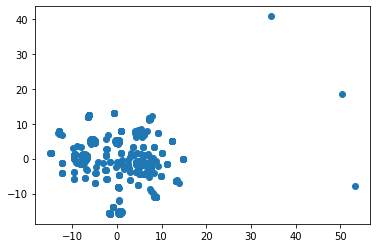

In [22]:
# Initialize t-SNE model, further reduce the noise. Helps to see if there are clusters.
tsne = TSNE(learning_rate=35, perplexity=50)
t_features = tsne.fit_transform(X_pca)
x_coord = t_features[:,0]
y_coord = t_features[:,1]

plt.scatter(x_coord, y_coord)

### Cluster Analysis with k-Means

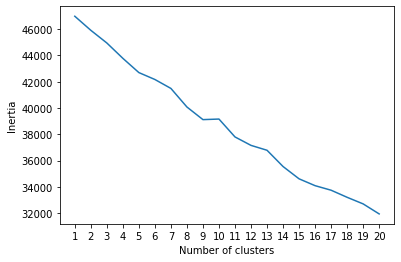

In [21]:
inertia = []
# Same as k = list(range(1, 11))
#k = [1,2,3,4,5,6,7,8,9,10]
k = range(1,21)

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,21))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Can't be clustred together